In [2]:
from os.path import join
import gym
import slimevolleygym
from matplotlib import pyplot as plt
import pandas as pd
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import A2C, PPO, DQN

MODELDIR = join('..', 'models')
LOGDIR = join('..', 'logs')
TIMESTEPS = 3e6

In [3]:
def plot_sb_results(filename):
    metrics = pd.read_csv(join('..', 'logs', filename), skiprows=1)
    episode_rew = metrics.loc[:, 'r']
    episode_rew_average = episode_rew.expanding().mean()
    episode_len = metrics.loc[:, 'l']
    episode_len_average = episode_len.expanding().mean()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

    ax1.plot(episode_rew, label='Reward per episode')
    ax1.plot(episode_rew_average, label='Mean reward per episode')
    ax1.set_xlabel('Episodes')
    ax1.set_ylabel('Reward')
    ax1.legend(loc='upper left')

    ax2.plot(episode_len, label='Length per episode')
    ax2.plot(episode_len_average, label='Mean length per episode')
    ax2.set_xlabel('Episodes')
    ax2.set_ylabel('# Timesteps')
    ax2.legend(loc='upper left');

In [3]:
slime_env = Monitor(env=gym.make('SlimeVolley-v0'),
                    filename=join('..', 'logs', 'ppo3m'))

ppo_model = PPO('MlpPolicy', slime_env, verbose=1)

ppo_model.learn(TIMESTEPS);
# ppo_model.save(join(MODELDIR, 'PPO_3M'))

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 567      |
|    ep_rew_mean     | -5       |
| time/              |          |
|    fps             | 1068     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 610         |
|    ep_rew_mean          | -5          |
| time/                   |             |
|    fps                  | 854         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012396848 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_varia

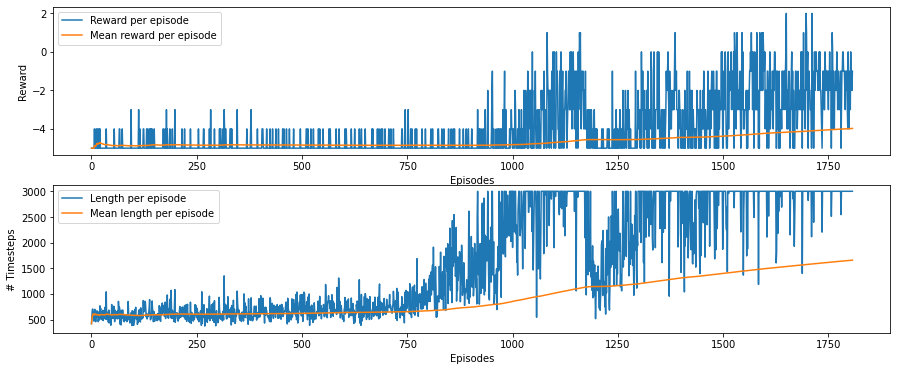

In [9]:
plot_sb_results('ppo3m.monitor.csv')

In [8]:
from sb3_contrib.common.wrappers import TimeFeatureWrapper

slime_env = Monitor(env=gym.make('SlimeVolley-v0'),
                    filename=join('..', 'logs', 'a2c6mHYP'))

slime_env_wr = TimeFeatureWrapper(slime_env, 3000)

a2c_model = A2C(policy='MlpPolicy',
                ent_coef=0.0,
                max_grad_norm=0.5,
                n_steps=8,
                gae_lambda=0.9,
                vf_coef=0.4,
                gamma=0.99,
                use_rms_prop=True,
                normalize_advantage=False,
                learning_rate=0.00096,
                # use_sde=True,
                # policy_kwargs="dict(log_std_init=-2, ortho_init=False, full_std=True)",
                env=slime_env_wr,
                verbose=1)

a2c_model.learn(2*TIMESTEPS)

c:\Users\Andres\anaconda3\envs\rl\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 689      |
|    ep_rew_mean        | -4       |
| time/                 |          |
|    fps                | 710      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 800      |
| train/                |          |
|    entropy_loss       | -1.69    |
|    explained_variance | -17.4    |
|    learning_rate      | 0.00096  |
|    n_updates          | 99       |
|    policy_loss        | 0.0674   |
|    value_loss         | 0.00351  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 688      |
|    ep_rew_mean        | -4       |
| time/                 |          |
|    fps                | 710      |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps   

In [9]:
a2c_model.save(join(MODELDIR, 'A2C_6M_HYP'))

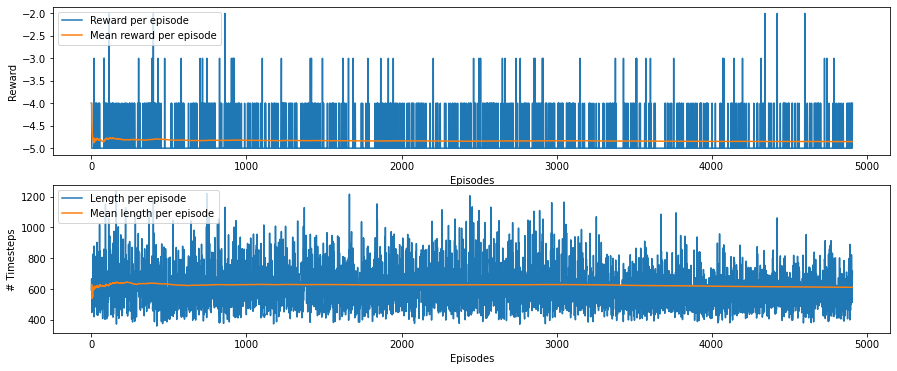

In [4]:
plot_sb_results('a2c3m.monitor.csv')

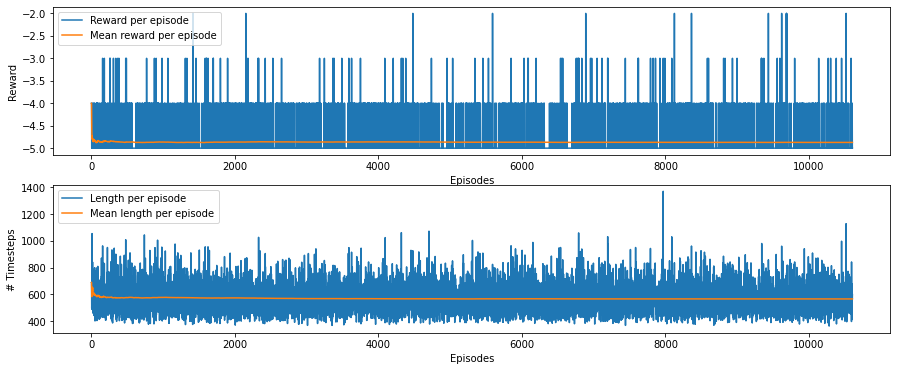

In [11]:
plot_sb_results('a2c6mHYP.monitor.csv')

In [5]:
slime_env = Monitor(env=gym.make('SlimeVolley-v0'),
                    filename=join('..', 'logs', 'dqn6m'))

dqn_model = DQN('MlpPolicy', slime_env, verbose=1)

dqn_model.learn(2*TIMESTEPS)

Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 622      |
|    ep_rew_mean      | -5       |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6286     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2488     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 589      |
|    ep_rew_mean      | -4.88    |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6272     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4715     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 603      |
|    ep_rew_mean      | -4.92    |
|    exploration_rate | 0.989    |
| t

In [7]:
dqn_model.save(join(MODELDIR, 'DQN_6M'))

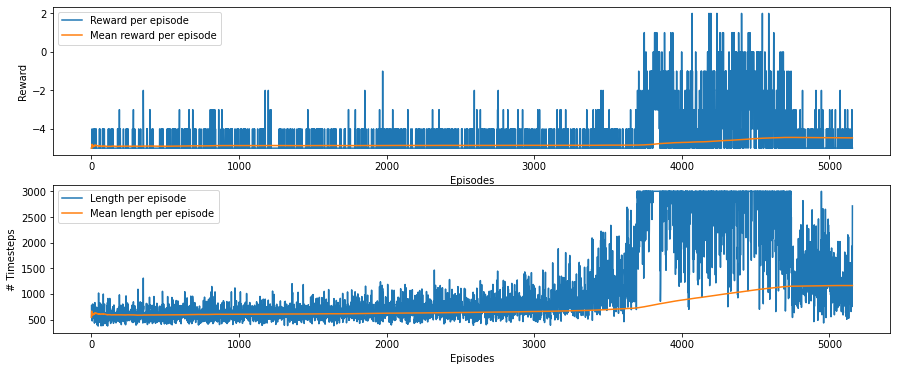

In [14]:
plot_sb_results('dqn6m.monitor.csv')